# Lesson 01: Enter Clustering
Machine Learning is divided into three main categories:

- supervised learning
- unsupervised learning
- reinforcement learning



## Supervised Learning

- all data used is labelled (with ground truth information)
- the algorithm is provided direct feedback
- the algorithm is meant to predict outcome


### Classification

<p><a href="https://commons.wikimedia.org/wiki/File:Svm_separating_hyperplanes.png#/media/File:Svm_separating_hyperplanes.png"><img src="https://upload.wikimedia.org/wikipedia/commons/2/20/Svm_separating_hyperplanes.png" alt="Svm separating hyperplanes.png" width="503" height="480"></a><br>By <a href="//commons.wikimedia.org/w/index.php?title=User:Cyc&amp;amp;action=edit&amp;amp;redlink=1" class="new" title="User:Cyc (page does not exist)">Cyc</a> - <span class="int-own-work" lang="en">Own work</span>, Public Domain, <a href="https://commons.wikimedia.org/w/index.php?curid=3566969">Link</a></p>


### Regression

<p><a href="https://commons.wikimedia.org/wiki/File:Linear_regression.svg#/media/File:Linear_regression.svg"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/640px-Linear_regression.svg.png" alt="Linear regression.svg"></a><br>By <a href="//commons.wikimedia.org/w/index.php?title=User:Sewaqu&amp;amp;action=edit&amp;amp;redlink=1" class="new" title="User:Sewaqu (page does not exist)">Sewaqu</a> - <span class="int-own-work" lang="en">Own work</span>, Public Domain, <a href="https://commons.wikimedia.org/w/index.php?curid=11967659">Link</a></p>



## Unsupervised Learning

- there are **NO** labels (with ground truth information)
- no feedback is provided to the algorithm
- goal: find hidden structure in data

<p><a href="https://commons.wikimedia.org/wiki/File:KMeans-Gaussian-data.svg#/media/File:KMeans-Gaussian-data.svg"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e5/KMeans-Gaussian-data.svg/1200px-KMeans-Gaussian-data.svg.png" alt="KMeans-Gaussian-data.svg"></a><br>By <a href="//commons.wikimedia.org/wiki/User:Chire" title="User:Chire">Chire</a> - <span class="int-own-work" lang="en">Own work</span>, <a href="https://creativecommons.org/licenses/by-sa/3.0" title="Creative Commons Attribution-Share Alike 3.0">CC BY-SA 3.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=17085714">Link</a></p>

## Reinforcement Learning

- model a decision process
- reward system
- learn series of actions

# Important Notation 

- we are given a dataset of size $n$ as   
$\mathcal{D} = \{ \langle \vec{x}, y \rangle_{i}, i = 1, \dots, n \} $

- the data represents a mapping:   
$f(\vec{x}) = y$

- machine learning produces a hypothesis:   
$h(\vec{x}) = \hat{y}$

## classification versus regression

- classification:   
$h : \mathcal{R}^n \rightarrow \mathcal{Z} $   
(e.g. for 3 categories $\{0,1,2\}$)

- regression:   
$h : \mathcal{R}^n \rightarrow \mathcal{R} $ (regression can also produce $\mathcal{R}^{n}$)  


# Data

For the following, I will rely on the Palmer penguin dataset obtained from [this repo](https://github.com/allisonhorst/palmerpenguins). To quote the repo:

> Data were collected and made available by [Dr. Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php)
> and the [Palmer Station, Antarctica LTER](https://pal.lternet.edu/), a member of the [Long Term Ecological Research Network](https://lternet.edu/).


In [1]:
import pandas as pd
print("pandas version:", pd.__version__)


pandas version: 1.2.4


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv")
print(df.head())
print(df.tail())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007  
       species island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
339  Chinstrap  Dream            55.8           19.8              207.0   
340  Chinstrap  Dream            43.5           18.1              202.0   
341  Chinstrap  Dream            49.6           18.2              193.0   
342  Chinstrap  Dream            50.8           19.0              210

In [3]:
#let's remove the rows with NaN values
df = df.dropna()

print("after cleaning:")
print(df.head())


after cleaning:
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
4       3450.0  female  2007  
5       3650.0    male  2007  


In [4]:
print(df.shape)
print(df.dtypes)
print(">> columns species, island and sex are encoded as strings!")

(333, 8)
species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object
>> columns species, island and sex are encoded as strings!


In [5]:
df[["species_"]] = df[["species"]].astype("category")
print(df[["species_"]].head())
print(df.species_.cat.codes.head())

  species_
0   Adelie
1   Adelie
2   Adelie
4   Adelie
5   Adelie
0    0
1    0
2    0
4    0
5    0
dtype: int8


In [6]:
print("make sure the categories are correctly encoded:\n")
print(pd.unique(df.species_))
print(pd.unique(df.species_.cat.codes))


make sure the categories are correctly encoded:

['Adelie', 'Gentoo', 'Chinstrap']
Categories (3, object): ['Adelie', 'Gentoo', 'Chinstrap']
[0 2 1]


There are 3 types of penguins in this dataset: 

![Artwork by @allison_horst](https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/man/figures/lter_penguins.png)



Important feature columns are:

![Artwork by @allison_horst](https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/man/figures/culmen_depth.png)

In [7]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [8]:
#to make out lives a bit easier, let's use a wrapper library for matplotlib
import seaborn as sns
print(f'seaborn version: {sns.__version__}')

seaborn version: 0.11.1


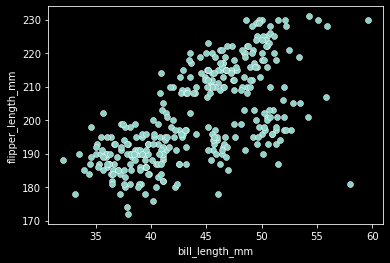

In [9]:
#we want to cluster the penguins and work towards a classification using this
sns.scatterplot(x=df.bill_length_mm, y=df.flipper_length_mm, palette="husl")
plt.show()

# nearest neighbors clustering

## Problem

- we already know that our dataset consists of 3 classes: `Adelie, Gentoo, Chinstrap`
- let's assume with **DO NOT** have the correct class label for each row


## Task 
- given this dataset 
$\mathcal{D} = \{ \langle \vec{x} \rangle_{i}, i = 1, \dots, n \} $
- find the $k=3$ clusters to which any of the known points belong to!



## Analysis

- basis algorithm: finding the nearest point for a query `x_q` given a reference `dataset`
  
```
def bruteforce_nearest_neighbor( x_q, dataset):
   closest_point = None
   closest_distance = infinity
   
   for i in range(n):
     x_i = dataset[i]
     current_distance = distance(x_i, x_q)
     if current_distance < closest_distance:
       closest_distance = current_distance
       closest_point = x_i
       
   return closest_point
```

- most common distance metric: Euclidean Distance $d(\vec{x}_a, \vec{x}_b) = \sqrt{ \sum_{j=1}^{m} (x_{j,a} - x_{j,b})^2 }$
- price: 
  + keep entire "training set" in memory
  + for each query point, go through entire dataset again (`bruteforce`)
  

### Naive Clustering / Llyod's algorithm

goal: create $k$ sets $S$ such as $argmin_{S} \sum^{k}_{i=1} \sum_{\vec{x} \in S_i} || \vec{x} - \vec{\mu}_i ||^2$


algorithm:

1. select $k$ points at random and assign them a cluster_id
   (consider these points to be the __mean__ of the cluster)
 
![by Weston.pace, from commons.wikimedia.org under CC-BY-SA 3.0](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5e/K_Means_Example_Step_1.svg/249px-K_Means_Example_Step_1.svg.png)
   
2. assign samples closest to a given cluster mean/centroid so that the variance of the cluster remains minimal

![by Weston.pace, from commons.wikimedia.org under CC-BY-SA 3.0](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/K_Means_Example_Step_2.svg/278px-K_Means_Example_Step_2.svg.png)

3. calculate the distance of all points to those cluster means (also called centroids) and update the mean cluster centroid for each cluster

![by Weston.pace, from commons.wikimedia.org under CC-BY-SA 3.0](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3e/K_Means_Example_Step_3.svg/278px-K_Means_Example_Step_3.svg.png)

4. Steps 2 and 3 are repeated until convergence has been reached, i.e. the cluster association does not change anymore.

![by Weston.pace, from commons.wikimedia.org under CC-BY-SA 3.0](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d2/K_Means_Example_Step_4.svg/278px-K_Means_Example_Step_4.svg.png)

In [10]:
import sklearn.cluster as skl_cluster
import numpy as np

kmeans = skl_cluster.KMeans(n_clusters=3, init='random')

data = np.stack((df.bill_length_mm, df.flipper_length_mm), axis=-1)

kmeans = kmeans.fit(data)


array([[ 38.45304348, 187.05217391],
       [ 45.95483871, 196.7311828 ],
       [ 47.6296    , 216.92      ]])

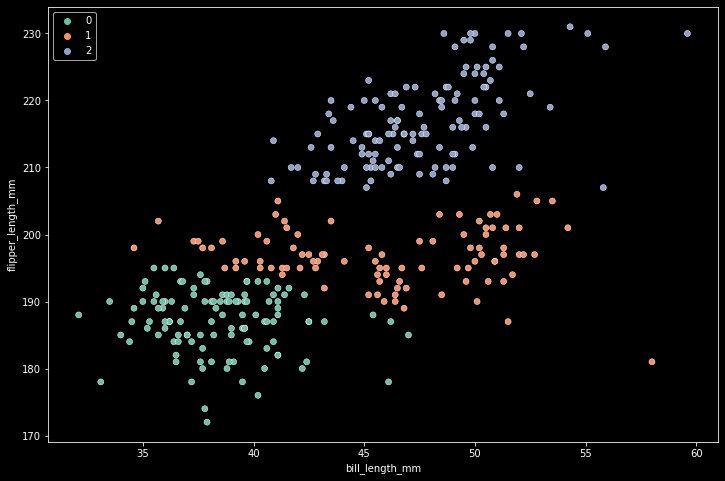

In [11]:
#let's see which clusters have been found
fig, ax = plt.subplots(1, figsize=(12,8))
sns.scatterplot(ax=ax,
                x=df.bill_length_mm,
                y=df.flipper_length_mm,
                hue=kmeans.labels_,
                palette="Set2")

kmeans.cluster_centers_

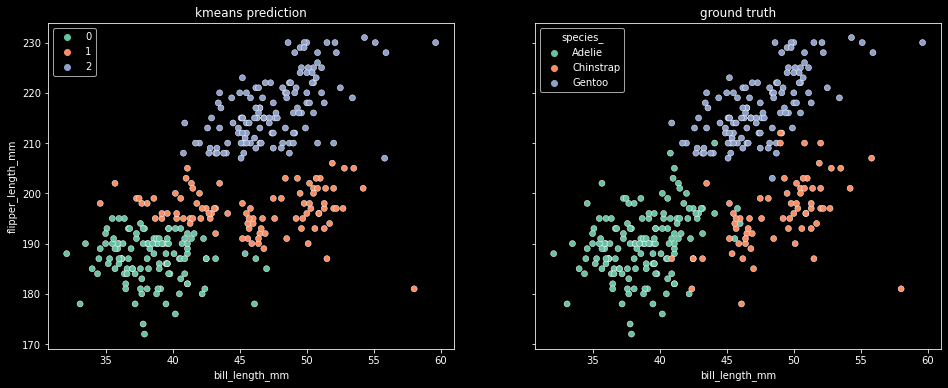

In [12]:
#let's compare to the real labels
fig, (left, right) = plt.subplots(1,2,figsize=(16,6), sharey = True, sharex=False)

sns.scatterplot(ax=left,
                x=df.bill_length_mm,
                y=df.flipper_length_mm,
                hue=kmeans.labels_,
                palette="Set2")
left = left.set_title("kmeans prediction")

sns.scatterplot(ax=right,
                x=df.bill_length_mm,
                y=df.flipper_length_mm,
                hue=df.species_,
                palette="Set2")
right = right.set_title("ground truth")



# Conclusions

- machine learning can be divided into 3 main categories: supervised learning, unsupervised learning, reinforcement learning

- unsupervised learning should be used to uncover hidden structure in data sets
    - it is useful if true labels/annotations are not available
    - kmeans clustering is one of the most widespread unsupervised algorithms available
    
- kmeans clustering works by creating cluster associations that minimize the cluster variance (similar to least squares regression)
    - if separation of clusters is not clear (they overlap), kmeans struggles
    - intelligent search algorithms are put to use to accelerate kmeans (among other aspects)

# Further Reading

- some parts of this material were inspired by the ever awesome [Sebastian Raschka](https://sebastianraschka.com)
  + general overview of machine learning [lesson 01](https://sebastianraschka.com/resources/ml-lectures-1.html#l01-what-is-machine-learning)
  + nearest neighbor methods [lesson 02](https://sebastianraschka.com/resources/ml-lectures-1.html#l02-nearest-neighbor-methods)
  
- the [wikipedia page on kmeans clustering](https://en.wikipedia.org/wiki/K-means_clustering) is well written too- plot the [decision boundary of the clustering](https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py)

In [195]:
wf = pd.read_csv("https://zenodo.org/record/4980359/files/weather_prediction_dataset.csv?download=1")
wf.describe()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
count,3.654000e+03,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,...,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000
mean,2.004568e+07,6.520799,5.418446,0.745107,1.017876,1.330380,0.234849,4.661193,11.022797,6.989135,...,5.104215,11.470635,3.677258,0.781872,1.016639,1.369787,0.186100,12.205802,7.860536,16.551779
std,2.874287e+04,3.450083,2.325497,0.107788,0.007962,0.935348,0.536267,4.330112,7.414754,6.653356,...,7.250744,8.950217,1.519866,0.115572,0.018885,0.926472,0.422151,6.467155,5.692256,7.714924
min,2.000010e+07,1.000000,0.000000,0.380000,0.985600,0.050000,0.000000,0.000000,-9.300000,-16.000000,...,-19.700000,-14.500000,0.700000,0.330000,0.000300,0.050000,0.000000,-6.200000,-13.000000,-3.100000
25%,2.002070e+07,4.000000,4.000000,0.670000,1.013300,0.530000,0.000000,0.500000,5.300000,2.000000,...,0.000000,4.100000,2.600000,0.700000,1.012100,0.550000,0.000000,7.600000,3.700000,10.800000
50%,2.004567e+07,7.000000,6.000000,0.760000,1.017700,1.110000,0.000000,3.600000,11.400000,7.300000,...,5.000000,11.000000,3.400000,0.800000,1.017300,1.235000,0.000000,12.300000,8.300000,16.600000
75%,2.007070e+07,10.000000,7.000000,0.830000,1.022700,2.060000,0.210000,8.000000,16.900000,12.400000,...,11.200000,19.000000,4.600000,0.870000,1.022200,2.090000,0.160000,17.200000,12.300000,22.400000
max,2.010010e+07,12.000000,8.000000,0.980000,1.040800,3.550000,7.570000,15.300000,29.000000,20.800000,...,21.200000,32.900000,10.800000,1.000000,1.041400,3.560000,6.200000,31.200000,22.600000,39.800000


In [219]:
sf = wf.query('MONTH > 5 & MONTH < 9')
sf.MONTH.value_counts()

7    310
8    310
6    300
Name: MONTH, dtype: int64

In [220]:
assert (wf.columns == sf.columns).all()

In [16]:
[ item for item in wf.columns if "BASEL" in item ]

['BASEL_cloud_cover',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max']

In [17]:
[ item for item in wf.columns if "temp_mean" in item ]

['BASEL_temp_mean',
 'BUDAPEST_temp_mean',
 'DE_BILT_temp_mean',
 'DRESDEN_temp_mean',
 'DUSSELDORF_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MALMO_temp_mean',
 'MONTELIMAR_temp_mean',
 'MUENCHEN_temp_mean',
 'OSLO_temp_mean',
 'PERPIGNAN_temp_mean',
 'ROMA_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'TOURS_temp_mean']

In [171]:
feature_cols = [ item for item in wf.columns if "kassel" in item.lower() or "oslo" in item.lower() or "stockholm" in item.lower() or "perpignan" in item.lower() ]

In [172]:
feature_cols

['KASSEL_wind_speed',
 'KASSEL_wind_gust',
 'KASSEL_humidity',
 'KASSEL_pressure',
 'KASSEL_global_radiation',
 'KASSEL_precipitation',
 'KASSEL_sunshine',
 'KASSEL_temp_mean',
 'KASSEL_temp_min',
 'KASSEL_temp_max',
 'OSLO_cloud_cover',
 'OSLO_wind_speed',
 'OSLO_wind_gust',
 'OSLO_humidity',
 'OSLO_pressure',
 'OSLO_global_radiation',
 'OSLO_precipitation',
 'OSLO_sunshine',
 'OSLO_temp_mean',
 'OSLO_temp_min',
 'OSLO_temp_max',
 'PERPIGNAN_wind_speed',
 'PERPIGNAN_humidity',
 'PERPIGNAN_pressure',
 'PERPIGNAN_global_radiation',
 'PERPIGNAN_precipitation',
 'PERPIGNAN_temp_mean',
 'PERPIGNAN_temp_min',
 'PERPIGNAN_temp_max',
 'STOCKHOLM_cloud_cover',
 'STOCKHOLM_pressure',
 'STOCKHOLM_precipitation',
 'STOCKHOLM_sunshine',
 'STOCKHOLM_temp_mean',
 'STOCKHOLM_temp_min',
 'STOCKHOLM_temp_max']

In [173]:
fcols = [ item for item in feature_cols if "cloud" in item.lower() or "precipitation" in item.lower() or "temp" in item.lower() ]

In [174]:
fcols

['KASSEL_precipitation',
 'KASSEL_temp_mean',
 'KASSEL_temp_min',
 'KASSEL_temp_max',
 'OSLO_cloud_cover',
 'OSLO_precipitation',
 'OSLO_temp_mean',
 'OSLO_temp_min',
 'OSLO_temp_max',
 'PERPIGNAN_precipitation',
 'PERPIGNAN_temp_mean',
 'PERPIGNAN_temp_min',
 'PERPIGNAN_temp_max',
 'STOCKHOLM_cloud_cover',
 'STOCKHOLM_precipitation',
 'STOCKHOLM_temp_mean',
 'STOCKHOLM_temp_min',
 'STOCKHOLM_temp_max']

In [175]:
len([ item for item in wf.columns if "wind" in item.lower() ])

19

In [176]:
len([ item for item in wf.columns if "temp_mean" in item.lower() ])

18

In [221]:
df = sf[ fcols ]
df["id"] = df.index
df.describe()


<ipython-input-221-77a1a0fa72a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["id"] = df.index


,KASSEL_precipitation,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,OSLO_cloud_cover,OSLO_precipitation,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,PERPIGNAN_precipitation,PERPIGNAN_temp_mean,PERPIGNAN_temp_min,PERPIGNAN_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_precipitation,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,id
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,0.231239,17.494457,12.411087,23.022935,5.395652,0.300685,16.679565,12.512174,21.626739,0.055565,23.832609,18.950870,28.716739,4.490217,0.224272,17.470217,13.682717,22.209674,1840.800000
std,0.508070,3.512137,2.994087,4.520013,1.881698,0.627099,3.066268,2.933441,3.809561,0.320495,2.814203,2.742186,3.454319,5.310379,0.514002,3.192917,2.891358,3.939486,1049.985903
min,0.000000,7.500000,4.600000,10.300000,0.000000,0.000000,8.300000,3.000000,11.500000,0.000000,13.000000,10.200000,15.000000,-99.000000,0.000000,7.200000,3.700000,10.200000,152.000000
25%,0.000000,15.000000,10.400000,19.800000,4.000000,0.000000,14.700000,10.500000,18.975000,0.000000,22.000000,17.200000,26.400000,3.000000,0.000000,15.375000,12.100000,19.575000,927.750000
50%,0.010000,17.300000,12.500000,22.800000,6.000000,0.000000,16.400000,12.800000,21.200000,0.000000,23.800000,19.000000,28.700000,5.000000,0.000000,17.400000,13.750000,22.000000,1841.000000
75%,0.212500,19.900000,14.500000,26.100000,7.000000,0.302500,18.525000,14.600000,24.000000,0.000000,25.700000,20.900000,31.000000,7.000000,0.180000,19.700000,15.600000,24.900000,2753.250000
max,5.420000,28.400000,21.100000,36.700000,8.000000,5.600000,25.400000,20.700000,33.000000,6.720000,31.800000,26.300000,38.200000,8.000000,4.300000,26.200000,21.200000,32.900000,3530.000000


In [222]:
kf = sf[ [ item for item in fcols if "kassel" in item.lower() or "oslo" in item.lower()  or "stockholm" in item.lower() or "perpignan" in item.lower() ] ]
kf.head()

,KASSEL_precipitation,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,OSLO_cloud_cover,OSLO_precipitation,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,PERPIGNAN_precipitation,PERPIGNAN_temp_mean,PERPIGNAN_temp_min,PERPIGNAN_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_precipitation,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max
152,0.00,16.5,8.5,20.9,5,1.19,10.0,3.7,15.5,0.0,20.6,14.3,27.0,4,0.30,12.4,7.6,17.1
153,0.00,21.3,12.3,26.6,5,0.05,12.3,9.0,16.6,0.0,19.6,17.6,21.5,7,0.56,12.8,9.8,17.0
154,4.13,19.2,13.7,28.9,1,0.00,11.3,5.6,16.6,0.0,20.5,16.3,24.7,1,0.00,13.6,10.3,17.3
155,0.37,20.1,14.6,26.1,2,0.00,10.8,3.9,16.6,0.0,22.4,18.1,26.7,1,0.00,11.9,8.0,15.8
156,1.15,16.6,15.1,23.4,4,0.00,11.9,7.0,17.1,1.0,21.4,17.3,25.5,1,0.00,11.0,7.2,15.8


In [223]:
kf.columns = [ "{}-{}".format("_".join(item.split("_")[1:]), item.split("_")[0]) for item in kf.columns ]
#kf.columns = [ item.replace("KASSEL_","KASSEL-") for item in kf.columns ]
kf["id"] = kf.index
kf.head()

<ipython-input-223-f8bd25678ff3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kf["id"] = kf.index


,precipitation-KASSEL,temp_mean-KASSEL,temp_min-KASSEL,temp_max-KASSEL,cloud_cover-OSLO,precipitation-OSLO,temp_mean-OSLO,temp_min-OSLO,temp_max-OSLO,precipitation-PERPIGNAN,temp_mean-PERPIGNAN,temp_min-PERPIGNAN,temp_max-PERPIGNAN,cloud_cover-STOCKHOLM,precipitation-STOCKHOLM,temp_mean-STOCKHOLM,temp_min-STOCKHOLM,temp_max-STOCKHOLM,id
152,0.00,16.5,8.5,20.9,5,1.19,10.0,3.7,15.5,0.0,20.6,14.3,27.0,4,0.30,12.4,7.6,17.1,152
153,0.00,21.3,12.3,26.6,5,0.05,12.3,9.0,16.6,0.0,19.6,17.6,21.5,7,0.56,12.8,9.8,17.0,153
154,4.13,19.2,13.7,28.9,1,0.00,11.3,5.6,16.6,0.0,20.5,16.3,24.7,1,0.00,13.6,10.3,17.3,154
155,0.37,20.1,14.6,26.1,2,0.00,10.8,3.9,16.6,0.0,22.4,18.1,26.7,1,0.00,11.9,8.0,15.8,155
156,1.15,16.6,15.1,23.4,4,0.00,11.9,7.0,17.1,1.0,21.4,17.3,25.5,1,0.00,11.0,7.2,15.8,156


In [224]:
tf = pd.wide_to_long(kf,
                     ["precipitation","temp_min", "temp_mean", "temp_max"]
                     ,
                     i="id", j="city", sep="-", suffix=r'\w+')
tf = tf.reset_index()
print(len(tf))
tf.city.value_counts()


3680


PERPIGNAN    920
OSLO         920
STOCKHOLM    920
KASSEL       920
Name: city, dtype: int64

In [229]:
kmeans2 = skl_cluster.KMeans(n_clusters=2, init='random')

data = np.stack((tf.temp_min, tf.temp_max), axis=-1)

kmeans2 = kmeans2.fit(data)



In [230]:
tf.columns

Index(['id', 'city', 'cloud_cover-OSLO', 'cloud_cover-STOCKHOLM',
       'precipitation', 'temp_min', 'temp_mean', 'temp_max'],
      dtype='object')

array([[ 38.45304348, 187.05217391],
       [ 45.95483871, 196.7311828 ],
       [ 47.6296    , 216.92      ]])

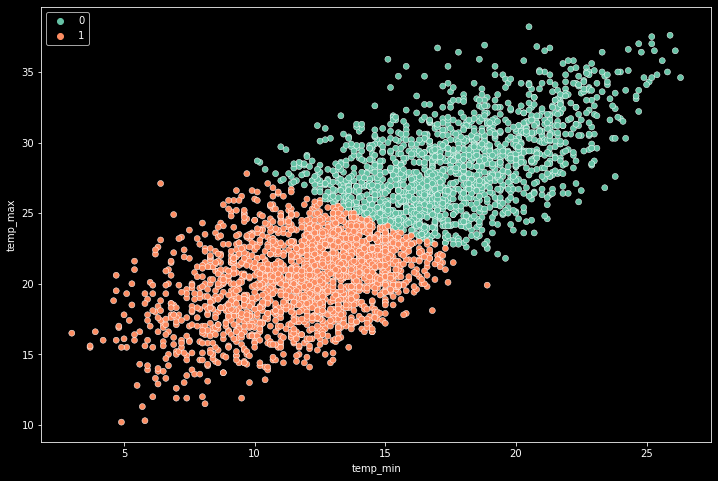

In [231]:
#let's see which clusters have been found
fig, ax = plt.subplots(1, figsize=(12,8))
sns.scatterplot(ax=ax,
                x=tf.temp_min,
                y=tf.temp_max,
                hue=kmeans2.labels_,
                palette="Set2")

kmeans.cluster_centers_

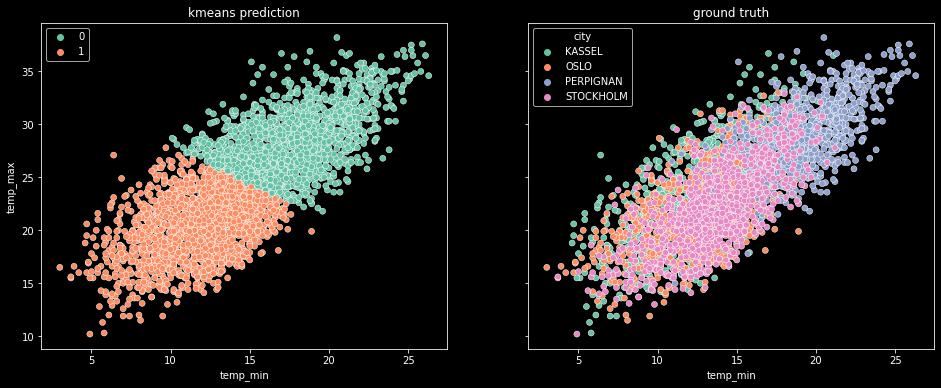

In [232]:
fig, (left, right) = plt.subplots(1,2,figsize=(16,6), sharey = True, sharex=False)

sns.scatterplot(ax=left,
                x=tf.temp_min,
                y=tf.temp_max,
                hue=kmeans2.labels_,
                palette="Set2")
left = left.set_title("kmeans prediction")

sns.scatterplot(ax=right,
                x=tf.temp_min,
                y=tf.temp_max,
                hue=tf.city,
                palette="Set2")
right = right.set_title("ground truth")